<a href="https://colab.research.google.com/github/mofanchang/ptt-Word-Embedding-sentiment-analysis/blob/main/%E3%80%8C%E7%89%A9%E4%BB%A5%E9%A1%9E%E8%81%9A%EF%BC%8C%E6%96%87%E5%AD%97%E4%B9%9F%E6%98%AF%EF%BC%81_%E2%80%94_%E6%96%87%E6%9C%AC%E8%81%9A%E9%A1%9E%E5%88%86%E6%9E%90(Clustering)_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

In [ ]:
titles=[]
training_set=[]
stopWords = []
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt') #建立詞頻表

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.015 seconds.
DEBUG:jieba:Loading model cost 2.015 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt', 'r', encoding='UTF-8') as file:   #建立停用詞列表
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/cutword-1.txt', 'r', encoding='UTF-8') as file:  #叫出剛剛存下來的標題文字檔
    for data in file.readlines():
        data = data.strip()
        titles.append(data)

In [ ]:
for title in titles:
    seg_list = jieba.lcut(title, cut_all=False)
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', seg_list))   #去除停用詞
    training_set.append(remainderWords)
    
print(training_set)

model = Word2Vec(training_set, min_count=1)

[['文章', '\t', '名稱'], ['標題', '\t', ':', '\t', ' ', '\t', '[', '\t', '情報', '\t', ']', '\t', ' ', '\t', '12', '\t', '/', '\t', '11', '\t', '「', '\t', '花蓮', '\t', '」', '\t', '捐血', '\t', '送', '\t', '全聯禮券', '\t', '400', '\t', '+', '\t', '春聯'], ['標題', '\t', ':', '\t', ' ', '\t', 'Re', '\t', ':', '\t', ' ', '\t', '[', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'iHerb', '\t', ' ', '\t', '年底', '\t', '清倉', '\t', '低', '\t', '至', '\t', '4', '\t', '折', '\t', '！'], ['標題', '\t', ':', '\t', ' ', '\t', '[', '\t', '情報', '\t', ']', '\t', ' ', '\t', '雷亞', '\t', ' ', '\t', 'Cytus', '\t', ' ', '\t', 'II', '\t', ' ', '\t', '手機', '\t', '音樂遊戲', '\t', ' ', '\t', '限免'], ['標題', '\t', ':', '\t', ' ', '\t', '[', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'Line', '\t', ' ', '\t', 'Point', '\t', ' ', '\t', '15'], ['標題', '\t', ':', '\t', ' ', '\t', '[', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'Zendure', '\t', ' ', '\t', '10000mAh', '\t', ' ', '\t', 'PD', '\t', '快', '\t', '充行動', '\t', '電源', '\t', ' ', '\t', '$', '\t', '911'],

In [ ]:
from gensim.models import word2vec

In [ ]:
model = word2vec.Word2Vec(training_set,size = 1)
model.save('jk.model')

In [ ]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    #print text
    for word in text.split():
        #print word
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
def sent_vectorizer(sent, model):  #建立sentence vector
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for record in training_set:
    X.append(sent_vectorizer(record, model))   
 
print ("========================")
print(X) #印出每個標題的vector

<ipython-input-9-bfd84729e5c7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = model[w]
<ipython-input-9-bfd84729e5c7>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = np.add(sent_vec, model[w])


[array([-2.7004821], dtype=float32), array([-2.550347], dtype=float32), array([-2.4123092], dtype=float32), array([-2.4478953], dtype=float32), array([-2.3743813], dtype=float32), array([-2.4942086], dtype=float32), array([-2.6487646], dtype=float32), array([-2.5242603], dtype=float32), array([-2.3483114], dtype=float32), array([-2.5222075], dtype=float32), array([-2.3198936], dtype=float32), array([-2.403189], dtype=float32), array([-2.4672742], dtype=float32), array([-2.3513167], dtype=float32), array([-2.6006954], dtype=float32), array([-2.3466268], dtype=float32), array([-2.5103588], dtype=float32), array([-2.4368865], dtype=float32), array([-2.3599544], dtype=float32), array([-2.428401], dtype=float32), array([-2.3614585], dtype=float32), array([-2.4749565], dtype=float32), array([-2.612803], dtype=float32), array([-2.3471785], dtype=float32), array([-2.3758974], dtype=float32), array([-2.3984628], dtype=float32), array([-2.5070148], dtype=float32), array([-2.4765925], dtype=float

In [ ]:
print(X)

[array([-2.7004821], dtype=float32), array([-2.550347], dtype=float32), array([-2.4123092], dtype=float32), array([-2.4478953], dtype=float32), array([-2.3743813], dtype=float32), array([-2.4942086], dtype=float32), array([-2.6487646], dtype=float32), array([-2.5242603], dtype=float32), array([-2.3483114], dtype=float32), array([-2.5222075], dtype=float32), array([-2.3198936], dtype=float32), array([-2.403189], dtype=float32), array([-2.4672742], dtype=float32), array([-2.3513167], dtype=float32), array([-2.6006954], dtype=float32), array([-2.3466268], dtype=float32), array([-2.5103588], dtype=float32), array([-2.4368865], dtype=float32), array([-2.3599544], dtype=float32), array([-2.428401], dtype=float32), array([-2.3614585], dtype=float32), array([-2.4749565], dtype=float32), array([-2.612803], dtype=float32), array([-2.3471785], dtype=float32), array([-2.3758974], dtype=float32), array([-2.3984628], dtype=float32), array([-2.5070148], dtype=float32), array([-2.4765925], dtype=float

In [ ]:
import jieba
import re

# 載入繁體
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt')
doc_seg = []

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/Lifeequailmoney.txt', 'r', encoding='utf-8') as file:
    text = file.readline()
    text = re.sub('[^\u4e00-\u9fa5]+','',text)
    doc_seg.append(jieba.lcut(text))

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/0131-write.txt', 'w', encoding='utf-8') as file:
    for doc in doc_seg:
        file.write(' '.join(doc))

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
Dumping model to file cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
Loading model cost 4.300 seconds.
DEBUG:jieba:Loading model cost 4.300 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
from gensim.models import word2vec
import gensim

# sg=1 -> skip-gram, sg=0 -> cbow
sg = 0
# 向前看幾個字或向後看幾個字
win_size = 2
# 向量維度
vector_size = 300
epochs = 10

# sentences = word2vec.LineSentence('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')
model = word2vec.Word2Vec(
    sentences, 
    size=300, 
    window=win_size, 
    sg=sg, 
    min_count=1,
    iter=epochs)

model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model')

NameError: ignored

In [ ]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model")

In [ ]:
model.most_similar(['全家'])

<ipython-input-14-9b1a1576cbfb>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['全家'])


[('PChome', 0.14696389436721802),
 ('台南', 0.13122132420539856),
 ('711', 0.12676627933979034),
 ('新聞', 0.11603961884975433),
 ('電子', 0.10434246063232422),
 ('特價', 0.09563684463500977),
 ('無印良品', 0.08755753934383392),
 ('整理', 0.08473358303308487),
 ('商城', 0.07896285504102707),
 ('免運', 0.07733015716075897)]

In [ ]:
model.most_similar(['咖啡'])

<ipython-input-15-84e6bf4d2e4e>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['咖啡'])


[('禮物', 0.11937759071588516),
 ('跑鞋', 0.11633827537298203),
 ('禮券', 0.11015921831130981),
 ('美式', 0.09711360931396484),
 ('露天', 0.0899081826210022),
 ('雙11', 0.08978258818387985),
 ('東森', 0.08483158051967621),
 ('限量', 0.0836886540055275),
 ('Yahoo', 0.08350703120231628),
 ('app', 0.08273544907569885)]

In [ ]:
model.most_similar(['蝦皮'])

<ipython-input-16-1cf74e840cda>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['蝦皮'])


[('711', 0.13127341866493225),
 ('10%', 0.11190274357795715),
 ('限時:', 0.10742688924074173),
 ('回饋', 0.10142046213150024),
 ('PChome', 0.0761193186044693),
 ('康是美', 0.07080568373203278),
 ('無線', 0.05612816661596298),
 ('指定', 0.04677848890423775),
 ('momo', 0.04631314426660538),
 ('家樂福', 0.04464329034090042)]

In [ ]:
model.most_similar(['捐血'])

<ipython-input-17-5aff319c901d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['捐血'])


[('電子書', 0.08843424916267395),
 ('美式', 0.0861135870218277),
 ('GoShare', 0.08480487763881683),
 ('買一送一', 0.08208522200584412),
 ('禮券', 0.08186818659305573),
 ('限定', 0.08156627416610718),
 ('全聯', 0.07738561928272247),
 ('2023', 0.07460490614175797),
 ('foodomo', 0.06933392584323883),
 ('購物', 0.06466174125671387)]

In [ ]:
model.most_similar(['1111'])

<ipython-input-18-9fc29e5d67a7>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['1111'])


[('雙11', 0.149257630109787),
 ('無印良品', 0.12689991295337677),
 ('新聞', 0.1186528354883194),
 ('紅包', 0.11368662118911743),
 ('蝦皮:', 0.10952110588550568),
 ('漢堡王', 0.10389812290668488),
 ('貼圖', 0.09916386008262634),
 ('簽到', 0.09596267342567444),
 ('露天', 0.09461773931980133),
 ('線上', 0.09282174706459045)]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32862 missing from current font.
  font.set_text

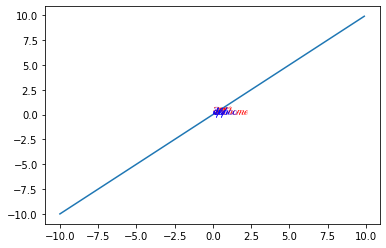

In [ ]:
from gensim.models import word2vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

mopdelfilePath = '/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model'
model = word2vec.Word2Vec.load(mopdelfilePath)
raw_word_vec = model.wv.vectors

cent_word1 = "全家"
cent_word2 = "咖啡"
cent_word3 = "捐血"
cent_word4 = "1111"
cent_word5 = "蝦皮"

wordList1 = model.wv.most_similar_cosmul(cent_word1)
wordList2 = model.wv.most_similar_cosmul(cent_word2)
# wordList3 = model.wv.most_similar_cosmul(cent_word3)
# wordList4 = model.wv.most_similar_cosmul(cent_word4)
# wordList5 = model.wv.most_similar_cosmul(cent_word5)


wordList1 = np.append([item[0] for item in wordList1], cent_word1)
wordList2 = np.append([item[0] for item in wordList2], cent_word2)
# wordList3 = np.append([item[0] for item in wordList3], cent_word3)
# wordList4 = np.append([item[0] for item in wordList4], cent_word4)
# wordList5 = np.append([item[0] for item in wordList5], cent_word5)

def get_word_index(word):
    index = model.wv.vocab[word].index
    return index

index_list1 = map(get_word_index, wordList1)
index_list2 = map(get_word_index, wordList2)
# index_list3 = map(get_word_index, wordList3)
# index_list4 = map(get_word_index, wordList4)
# index_list5 = map(get_word_index, wordList5)

vec_reduced = PCA(n_components=2).fit_transform(raw_word_vec)
zhfont = matplotlib.font_manager.FontProperties(fname=r'/content/drive/MyDrive/Colab Notebooks/wordcloud/himalaya.ttf')
x = np.arange(-10, 10, 0.1)
y = x
plt.plot(x, y)

for i in index_list1:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='r', fontproperties=zhfont)

for i in index_list2:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='b', fontproperties=zhfont)

# for i in index_list3:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='g', fontproperties=zhfont)

# for i in index_list4:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='k', fontproperties=zhfont)

# for i in index_list5:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)
# plt.show()

In [ ]:
/content/drive/MyDrive/Colab Notebooks/wordcloud/corpusSegDone.txt
/content/drive/MyDrive/Colab Notebooks/wordcloud/

SyntaxError: ignored

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
model = Word2Vec(
    LineSentence(open('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt', 'r', encoding='utf8')),
    sg = 0,
    size = 100,
    window = 3,
    min_count = 1,
    workers=8
)
 
# 词向量保存
model.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector', binary=False)
 
# 模型保存
model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')

In [ ]:

import gensim
 
# 1 通过模型加载词向量(recommend)
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
 
dic = model.wv.index2word
print(dic)
print(len(dic))
 
print(model.wv['限時'])
print(model.most_similar('限時', topn=1))
 
# 2 通过词向量加载
vector = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector')



['LINE', 'Line', '全家', '回饋', 'pay', '咖啡', 'momo', 'Momo', 'line', '捐血', '1111', '台北', '限定', '星巴克', 'Point', 'point', '免運', 'PChome', '點數', '美亞', '購物金', '家樂福', '支付', '整理', '會員', '導購', '電影票', '貼圖', '買一送一', '買1送1', '雙11', '711', '羅技', '好市多', '博客來', '限時', '活動', '蝦皮', '折扣', '購物', 'POINT', '康是美', '電子書', '7-11', '生活市集', '黑色購物', '無印良品', '漢堡王', '特價', '免費:', '限時:', '蝦皮:', '7-11:', '新聞', '指定', '討論', '露天', '限量', '柴油', 'OPENPOINT', '10%', '官網', '全聯', '2023', '商城', 'app', '全聯禮券', '騎乘金', '折價券', '肯德基', '熊貓', 'pro', '衛生紙', 'Yahoo', 'MOMO', '兌換', 'pchome', '線上', '優惠券', 'Pro', 'PCHOME', '好友', '滿額', '台南', '優惠碼', '飲料', 'GoShare', '無線', '加碼', '五折', '東森', '紅包', '電視', '電子', 'foodomo', '1212', 'points', '美式', '簽到', '禮物', '美國', '汽油', '跑鞋', '筆電', '禮券']
105
[-6.5837643e-04 -3.6959501e-03 -9.7280025e-04  5.1288993e-05
 -4.1758580e-04  2.9232644e-04 -7.8217621e-05  4.1955579e-03
 -4.1476111e-03  1.8319241e-03 -3.6804534e-03  2.0299952e-03
  4.6529577e-04  4.1330014e-03 -4.8638675e-03  2.3492174e-03
  1.2976741e-03 

<ipython-input-22-c8f61ad806c9>:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('限時', topn=1))


There are 105 words in vocab
please input how many words you want to plot:20


<ipython-input-23-b404fb17181f>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib

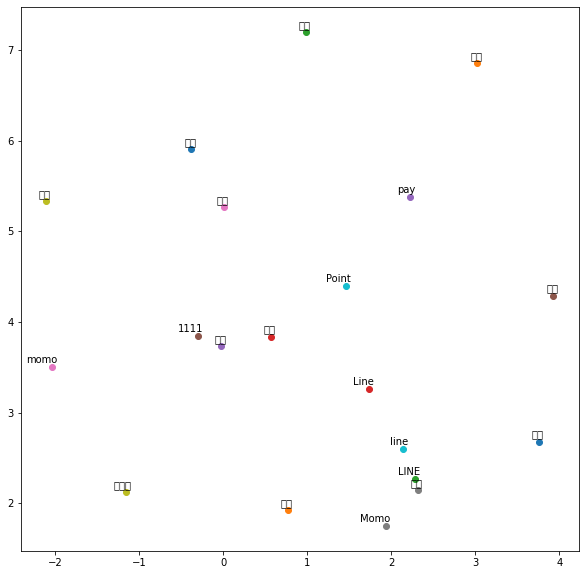

In [ ]:
from builtins import bytes, range
 
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="himalaya.ttf",size=20)
 
 
def tsne_plot(model, words_num):
 
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
 
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(10, 10))
    for i in range(words_num):
        plt.scatter(x[i], y[i])
        if b'\xe0' in bytes(labels[i],encoding="utf-8"):
            this_font = font
        else:
            this_font = 'SimHei'
        plt.annotate(labels[i],
                     Fontproperties=this_font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
 
if __name__ == '__main__':
    model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
    print(f'There are {len(model.wv.index2word)} words in vocab')
    word_num = int(input('please input how many words you want to plot:'))
    tsne_plot(model, word_num)

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

titles=[]
training_set=[]
stopWords = []
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt') #建立詞頻表

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt', 'r', encoding='UTF-8') as file:   #建立停用詞列表
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt', 'r', encoding='UTF-8') as file:  #叫出剛剛存下來的標題文字檔
    for data in file.readlines():
        data = data.strip()
        titles.append(data)
        
for title in titles:
    seg_list = jieba.lcut(title, cut_all=False)
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', seg_list))   #去除停用詞
    training_set.append(remainderWords)
    
print(training_set)

model = Word2Vec(training_set, min_count=1)

[['隨著', '白宮', '和', '加州', '分別', '宣布', '將於', '5', '月底', '和', '2', '月底', '結束', '疫情', '緊急狀態', '和', '公共衛生', '緊急狀態', '，', '灣區', '為', '數百萬', '居民', '提供', '服務', '的', '疫苗', '接種', '站', '和', '檢測站', '，', '將在', '未來', '幾個', '月', '內', '逐步', '停止', '營運', '，', '象徵', '著', '這項', '為', '百年一遇', '的', '疫情', '調動', '大規模', '公共衛生', '資源', '的', '行動', '即將', '告一段落', '。'], [], ['這項', '地方', '和', '聯邦', '層級', '措施', '的', '改變', '意味著', '，', '與', '新冠', '相關', '的', '醫療保健', '成本', '將', '轉嫁到', '消費者', '身上', '，', '民眾', '未來', '仍然', '可以', '透過', '私人', '醫療保險', '和', '藥房', '接種', '疫苗', '和', '接受', '檢測', '。'], [], ['聖', '他', '克拉拉', '縣', '1', '日', '宣布', '，', '會', '在', '本月底', '前', '拆除', '位於', '聖', '他', '克拉拉', '縣', '廣場', '（', 'San', ' ', 'Jose', ' ', 'County', ' ', 'Fairgrounds', '）', '、', '聖馬汀', '（', 'San', ' ', 'Martin', '）', '和', '山景', '城', '三個', '僅存', '的', '疫苗', '接種', '站', '和', '檢測站', '，', '拆除', '時間', '約', '在', '24', '日到', '28', '日', '之間', '。', '聖', '他', '克拉拉', '縣', '官員', '表示', '，', '他們', '會', '繼續', '在', '診所', '和', '醫院', '為', '低收入', '居民', '提

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/training_set.txt', 'w') as f:
    for item in training_set:
        f.write("%s\n" % item)

In [ ]:
import pandas as pd

df = pd.DataFrame(training_set)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/words.csv', index=False)

In [ ]:
def sent_vectorizer(sent, model):  #建立sentence vector
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for record in training_set:
    X.append(sent_vectorizer(record, model))   
 
print ("========================")
print(X) #印出每個標題的vector

[array([-1.15760544e-03, -7.72553554e-04,  8.42209847e-04, -1.32518134e-03,
        1.29350165e-05,  6.56360353e-04,  5.54362778e-04,  9.65141371e-05,
        7.95805769e-04, -2.91769189e-04,  1.66234386e-03, -2.06129975e-03,
       -8.63881374e-04,  3.28274386e-04, -1.23165862e-03, -5.74172649e-04,
        1.79251205e-04, -4.68112208e-04,  1.62508382e-04,  9.82810743e-04,
        3.22529231e-04, -2.16547429e-04, -1.88320410e-03,  8.12477490e-04,
        1.19366474e-03,  1.61176093e-03,  4.03843034e-04,  9.66835651e-04,
        6.38881873e-04,  7.34933128e-04, -3.37173202e-04, -9.79409437e-04,
       -8.72872828e-04, -6.58664096e-04, -2.91522068e-04, -2.65464972e-04,
       -3.92234826e-04, -1.05910387e-03,  1.10335110e-04, -6.11047144e-04,
       -6.16715115e-04, -5.71960118e-04, -8.76734382e-04,  3.54845688e-04,
       -6.45965978e-04, -9.37700388e-04, -3.33232834e-04,  2.44698516e-04,
       -7.31153879e-04, -1.44560472e-04, -4.52617358e-04, -4.01077501e-04,
        1.52969221e-03, 

<ipython-input-27-bfd84729e5c7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = model[w]
<ipython-input-27-bfd84729e5c7>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = np.add(sent_vec, model[w])


In [ ]:
import word2vec

In [ ]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=143989 sha256=3819a33eedc4fd7187d97352d5bacf537c54caddf239f5efc5864fbcf226d639
  Stored in directory: /root/.cache/pip/wheels/d9/b0/11/87d7a6c76458790285839bd80e87ddc52dc4108f0063f24307
Successfully built word2vec


In [ ]:
import jieba
import re

# 載入繁體
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt')
doc_seg = []

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt', 'r', encoding='utf-8') as file:
    text = file.readline()
    text = re.sub('[^\u4e00-\u9fa5]+','',text)
    doc_seg.append(jieba.lcut(text))

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/delete_words.txt', 'w', encoding='utf-8') as file:
    for doc in doc_seg:
        file.write(' '.join(doc))

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
Loading model cost 2.661 seconds.
DEBUG:jieba:Loading model cost 2.661 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
from gensim.models import word2vec
import gensim

# sg=1 -> skip-gram, sg=0 -> cbow
sg = 0
# 向前看幾個字或向後看幾個字
win_size = 2
# 向量維度
vector_size = 300
epochs = 10

sentences = word2vec.LineSentence("/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt")
model = word2vec.Word2Vec(
    sentences, 
    size=300, 
    window=win_size, 
    sg=sg, 
    min_count=1,
    iter=epochs)

model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/word2vec.model')

In [ ]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/wordcloud/news/word2vec.model")

In [ ]:
model['白宮']

<ipython-input-34-a4e6e0769029>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['白宮']


array([ 1.5357432e-03, -9.7624108e-04,  1.2554349e-03,  2.8919478e-04,
       -1.1494883e-03, -6.7802583e-04,  1.2076919e-03, -8.7056885e-04,
        7.1877596e-04,  1.5938759e-03, -1.4376234e-03, -1.2296642e-03,
       -3.8870174e-04, -1.1172909e-03,  5.2307284e-04,  5.2032079e-05,
       -1.4585709e-03,  4.9783872e-04,  3.0313318e-05, -7.3982286e-04,
       -1.3594037e-03, -1.0288451e-03,  8.9901738e-04, -9.4806380e-04,
        1.5452889e-03, -2.0579576e-04,  4.5144968e-04,  7.3218963e-04,
        4.7646754e-04,  1.3485564e-04,  1.3336642e-03,  1.3104513e-03,
       -6.2380801e-04, -1.0641931e-03,  1.1787252e-03, -7.4654480e-04,
        1.1547357e-03,  8.1297557e-04, -1.2625173e-03,  1.4078793e-03,
       -1.8004357e-04, -1.2239730e-03,  9.2025357e-04, -1.0623371e-03,
       -1.4018374e-03,  1.4621043e-03, -1.6093017e-04,  7.7368124e-05,
       -2.6353920e-04,  8.4755785e-04, -4.6623769e-04,  1.2031830e-03,
        1.2977425e-03,  1.5094978e-03,  1.4755850e-03,  1.0560008e-03,
      

In [ ]:
model.most_similar(['加州'])

<ipython-input-35-eb76a4909d94>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['加州'])


[('數百萬', 0.09061385691165924),
 ('月', 0.07685694098472595),
 ('調動', 0.060758501291275024),
 ('百年一遇', 0.03981839120388031),
 ('內', 0.03472841903567314),
 ('緊急狀態', 0.03419416397809982),
 ('將於', 0.029606621712446213),
 ('白宮', 0.028815630823373795),
 ('這項', 0.02266082540154457),
 ('資源', 0.01993945986032486)]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28771 missing from current font.
  font.set_

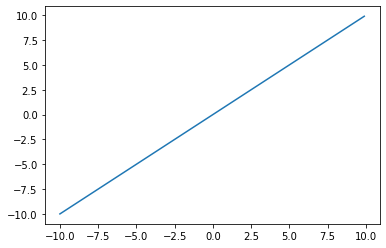

In [ ]:
from gensim.models import word2vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# mopdelfilePath = 'D:\\ML_learning\\NLP_data\\model.bin'
# model = word2vec.Word2Vec.load(mopdelfilePath)
raw_word_vec = model.wv.vectors

cent_word1 = "白宮"
cent_word2 = "公共衛生"
# cent_word3 = "淘宝"
# cent_word4 = "自行车"
# cent_word5 = "计算机"

wordList1 = model.wv.most_similar_cosmul(cent_word1)
wordList2 = model.wv.most_similar_cosmul(cent_word2)
# wordList3 = model.wv.most_similar_cosmul(cent_word3)
# wordList4 = model.wv.most_similar_cosmul(cent_word4)
# wordList5 = model.wv.most_similar_cosmul(cent_word5)


wordList1 = np.append([item[0] for item in wordList1], cent_word1)
wordList2 = np.append([item[0] for item in wordList2], cent_word2)
# wordList3 = np.append([item[0] for item in wordList3], cent_word3)
# wordList4 = np.append([item[0] for item in wordList4], cent_word4)
# wordList5 = np.append([item[0] for item in wordList5], cent_word5)

def get_word_index(word):
    index = model.wv.vocab[word].index
    return index

index_list1 = map(get_word_index, wordList1)
index_list2 = map(get_word_index, wordList2)
# index_list3 = map(get_word_index, wordList3)
# index_list4 = map(get_word_index, wordList4)
# index_list5 = map(get_word_index, wordList5)

vec_reduced = PCA(n_components=2).fit_transform(raw_word_vec)
zhfont = matplotlib.font_manager.FontProperties(fname=r'/content/drive/MyDrive/Colab Notebooks/wordcloud/himalaya.ttf')
x = np.arange(-10, 10, 0.1)
y = x
plt.plot(x, y)

for i in index_list1:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='r', fontproperties=zhfont)

for i in index_list2:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='b', fontproperties=zhfont)

# for i in index_list3:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='g', fontproperties=zhfont)

# for i in index_list4:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='k', fontproperties=zhfont)

# for i in index_list5:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)
plt.show()